In [1]:
# Importing Liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Case 1

In [2]:
# Importing cvs to DataFrame
df = pd.read_csv('/content/TFP.csv')

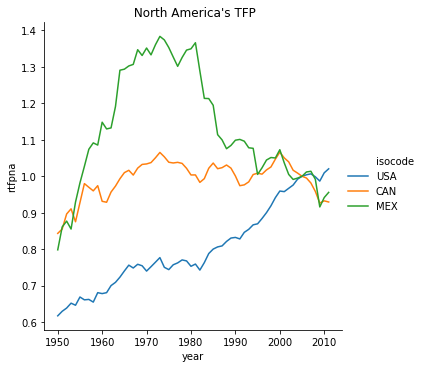

In [3]:
# Exploratory Analysis 
sns.relplot(x='year', y = 'rtfpna', data  = df, kind = 'line', hue = 'isocode', ci = None)
plt.title(' North America\'s TFP')
plt.show()

# It is possible to notice the difference in TFP between countries over the years.
# The Mexican TFP behavior is the most discrepant one. It had a huge up until the 80s and then it had a drastic fall.  
# The Canadian one kept a steady behavior on the sample analyzed and the American one had a constant rise.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

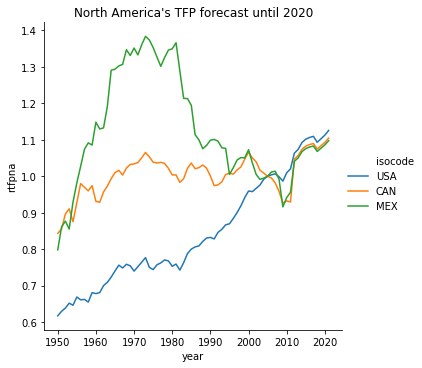

In [4]:
# 10 Years forecast 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Function for 10 years prediction with linear model
def forecast(df_pais):
  forecast_years = 10

  df_pred = df_usa[['rtfpna']]
  df_pred['prediction'] = df_usa[['rtfpna']].shift(-forecast_years)

  x = np.array(df_pred.drop(['prediction'],1))
  x = x[:-forecast_years]

  y = np.array(df_pred['prediction'])
  y = y[:-forecast_years]

  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

  lr = LinearRegression()
  lr.fit(x_train, y_train)

  x_forecast = np.array(df_pred.drop(['prediction'],1))[-forecast_years:]

  lr_prediction = lr.predict(x_forecast)
  return(lr_prediction)
 
#  Use the function above to calculate the predictons for each country
forecast_dates = pd.Series([2012,2013,2014,2015,2016,2017,2018,2018,2020,2021])

df_usa = df[df['isocode'] == 'USA'] 
df_mex = df[df['isocode'] == 'MEX']
df_can = df[df['isocode'] == 'CAN'] 

usa = pd.DataFrame( (['USA', date] for date in forecast_dates), columns=('isocode', 'year'))
usa['rtfpna'] = forecast(df_usa)

mex = pd.DataFrame( (['MEX', date] for date in forecast_dates), columns=('isocode', 'year'))
mex['rtfpna'] = forecast(df_mex)

can = pd.DataFrame( (['CAN', date] for date in forecast_dates), columns=('isocode', 'year'))
can['rtfpna'] = forecast(df_can)

predictions = df.append(usa.append(mex.append(can)))

sns.relplot(x='year', y = 'rtfpna', data  = predictions, hue = 'isocode' , kind = 'line', ci = None)
plt.title('North America\'s TFP forecast until 2020')
plt.show()


In [5]:
# Can you think about another feature that could be helpful in explaining TFP series?

# I think that the     xr: Exchange rate, national currency/USD (market and estimated)
# could help to explain the TFP Series. Until 1982 the Mexican Exchange rate was low compared to USD, but after that, 
# the coin lost value and impacted the measurements of income and productivity while in Canada it remained approximately the same.


# Case 2

In [6]:
df2 = pd.read_csv('/content/data_comexstat.csv')
df2 = df2.dropna()
print(df2.head())

         date product state        country    type   route    tons       usd
0  1997-01-01    corn    ES  United States  Import     Sea  44.045  113029.0
1  1997-01-01    corn    GO      Argentina  Import  Ground  54.000   36720.0
2  1997-01-01    corn    GO        Bolivia  Export  Ground   0.200     180.0
3  1997-01-01    corn    GO  United States  Export     Sea   3.488    5688.0
4  1997-01-01    corn    MG      Argentina  Import  Ground  27.000   18630.0


#1

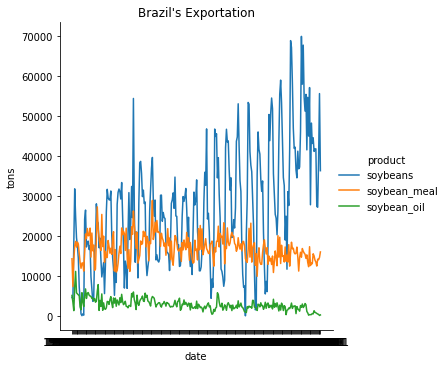

In [7]:
df_export = df2[df2['type'] == 'Export']

br_soy = df_export[df_export['product'] == 'soybeans']
br_meal = df_export[df_export['product'] == 'soybean_meal']
br_oil = df_export[df_export['product'] == 'soybean_oil']

br_prod = br_soy.append(br_meal.append(br_oil))

# Monthly exports
sns.relplot(x='date', y = 'tons', data  = br_prod, kind = 'line', hue = 'product', ci = None)
plt.title('Brazil\'s Exportation')
plt.show()



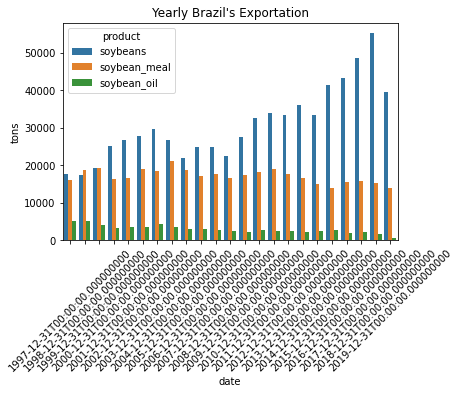

In [8]:
br_soy = df_export[df_export['product'] == 'soybeans']
br_meal = df_export[df_export['product'] == 'soybean_meal']
br_oil = df_export[df_export['product'] == 'soybean_oil']
br_corn = df_export[df_export['product'] == 'corn']

def export(exports):
  exports.set_index('date', inplace=True)
  exports.index = pd.to_datetime(exports.index)
  return (exports.resample('1Y').mean())

# Calculates the yearly production of soybeans
br_prod_year_soy = export(br_soy)

for n in br_prod_year_soy['tons']:
  br_prod_year_soy['product'] = 'soybeans' 

# Calculates the yearly production of soybean_meal
br_prod_year_meal = export(br_meal)

for n in br_prod_year_meal['tons']:
  br_prod_year_meal['product'] = 'soybean_meal' 

# Calculates the yearly production of soybean_oil
br_prod_year_oil = export(br_oil)

for n in br_prod_year_oil['tons']:
  br_prod_year_oil['product'] = 'soybean_oil' 

# Combine all the products to a single df
br_prod_year = br_prod_year_soy.append(br_prod_year_meal.append(br_prod_year_oil))

# Total tons of each product exported per year
sns.barplot(x=br_prod_year.index, y = 'tons', data  = br_prod_year, hue = 'product')
plt.xticks(rotation=45)
plt.title('Yearly Brazil\'s Exportation')
plt.show()

#2

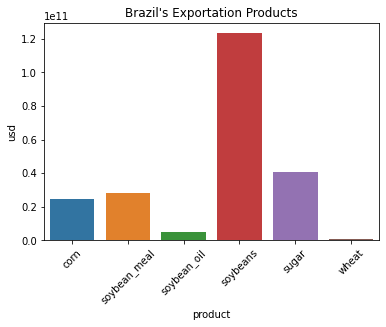

In [9]:
# Filter the national exports by date
df_export_5y = df_export[(df_export['date'] > '2014-12-31') & (df_export['date'] < '2020-01-01')]

# Group them to know the USD value
df_export_5y = df_export_5y.groupby(df_export_5y['product']).sum()

# Total amount of money of each product exported in the last 5 years
sns.barplot(x=df_export_5y.index, y = 'usd', data  = df_export_5y)
plt.xticks(rotation=45)
plt.title('Brazil\'s Exportation Products')
plt.show()

# The 3 most important products are Soybeans, Sugar and Soybean_meal.

#3

Corn exportations per route:
                tons           usd
route                             
Air     1.015261e+04  4.334926e+06
Ground  7.250953e+04  1.717586e+08
Other   2.660552e+05  4.413550e+07
River   5.869627e+06  9.663762e+08
Sea     1.383810e+08  2.326112e+10


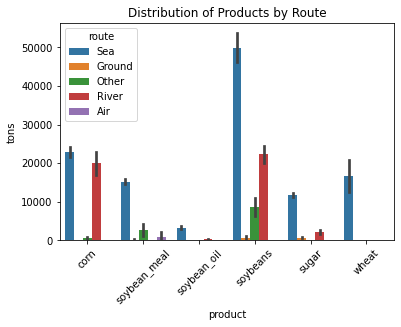

In [10]:
# Filter the national exports by date & product Corn
df_export_5y = df_export[(df_export['date'] > '2014-12-31') & (df_export['date'] < '2020-01-01')]
df_export_5y_corn = df_export_5y[df_export_5y['product'] == 'corn']

# Group them by Route and sum the TONS and USD values
df_export_5y_corn_route = df_export_5y_corn.groupby(df_export_5y_corn['route']).sum()

print('Corn exportations per route:')
print(df_export_5y_corn_route)


# Shows the total Tons exported of each product per Route in the past years
sns.barplot(x='product', y = 'tons', data  = df_export_5y, hue = 'route')
plt.xticks(rotation=45)
plt.title('Distribution of Products by Route')
plt.show()

# The main routes that Brazil has been exporting corn in the past years are mainly by Sea, followed by River and Other.

# The products have about the same route distribuition behavior with few exceptions:
# - Corn is the only product that has aproxemetly the same volume of transportation between 'Sea' and 'River'.
# - Soybeans_meal is the only product that has 'Other' as the 2nd biggest transportation mean.
# - Wheat is not transported by River.

#4

                    tons           usd
country                               
Iran        1.785774e+07  3.302428e+09
Bangladesh  9.560076e+06  2.591054e+09
Algeria     8.315540e+06  2.441462e+09
Egypt       1.142502e+07  2.385649e+09
Malaysia    7.220061e+06  1.735365e+09


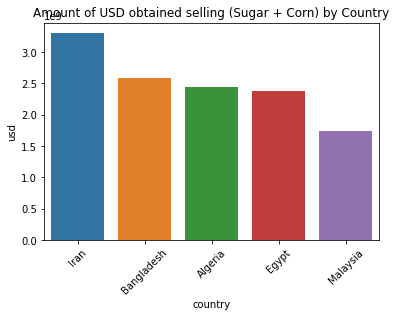

In [11]:
# Filter the national exports by date & product Corn + Sugar
df_export_3y = df_export[(df_export['date'] > '2016-12-31') & (df_export['date'] < '2020-01-01')]
df_export_3y_corn_sugar = df_export_3y[(df_export_3y['product'] == 'corn') | (df_export_3y['product'] == 'sugar')]

# Group them by Country and sum the TONS and USD values
df_countries = df_export_3y_corn_sugar.groupby(df_export_3y_corn_sugar['country']).sum()

# Sort the countries by USD exported in the past 3 years 
df_countries = df_countries.sort_values(by = 'usd', ascending= False)

print(df_countries.head())

df_countries_top = df_countries.head()
sns.barplot(x=df_countries_top.index, y = 'usd', data  = df_countries_top)
plt.xticks(rotation=45)
plt.title('Amount of USD obtained selling (Sugar + Corn) by Country')
plt.show()
# Comparing the Corn + Sugar USD exportations, the most important partners are:
#  1 - Iran
#  2 - Bangladesh
#  3 - Algeria

#5

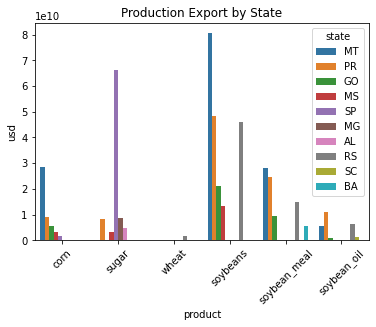

In [12]:
corn = ['corn','corn','corn','corn','corn']
sugar = ['sugar','sugar','sugar','sugar','sugar']
wheat = ['wheat','wheat','wheat','wheat','wheat']
soybeans = ['soybeans','soybeans','soybeans','soybeans','soybeans']
soybean_meal = ['soybean_meal','soybean_meal','soybean_meal','soybean_meal','soybean_meal']
soybean_oil = ['soybean_oil','soybean_oil','soybean_oil','soybean_oil','soybean_oil']

df_export_corn = df_export[df_export['product'] == 'corn']
df_export_wheat = df_export[df_export['product'] == 'wheat']
df_export_soybeans = df_export[df_export['product'] == 'soybeans']
df_export_soybean_meal = df_export[df_export['product'] == 'soybean_meal']
df_export_soybean_oil = df_export[df_export['product'] == 'soybean_oil']
df_export_sugar = df_export[df_export['product'] == 'sugar']


# Group the df by state, summing the values of USD for future reference and sort them into descending order.
def top_states(df, product_list):
  df = df.groupby(df['state']).sum().sort_values(by = 'usd', ascending= False).head(5)
  df['product'] = product_list
  return(df)
 

# Calculate the states per product
df_export_corn = top_states(df_export_corn, corn)
df_export_sugar = top_states(df_export_sugar, sugar)
df_export_wheat = top_states(df_export_wheat, wheat)
df_export_soybeans = top_states(df_export_soybeans, soybeans)
df_export_soybean_meal = top_states(df_export_soybean_meal, soybean_meal)
df_export_soybean_oil = top_states(df_export_soybean_oil,soybean_oil)

df_states = df_export_corn.append(df_export_sugar.append(df_export_wheat.append(df_export_soybeans.append(df_export_soybean_meal.append(df_export_soybean_oil)))))


# USD exported per state per product
sns.barplot(x='product', y = 'usd', data  = df_states, hue = df_states.index)
plt.xticks(rotation=45)
plt.title('Production Export by State')
plt.show()

# The mains states are:
#
#           Corn  Sugar   Wheat   Soybeans  Soybeans_meal   Soybeans_oil
# State 1°  MT    SP      RS      MT        MT              PR
# State 2°  PR    MG      PR      PR        PR              RS
# State 3°  GO    PR      SC      RS        RS              MT
# State 4°  MS    AL      SP      GO        GO              SC
# State 5°  SP    MS      MS      MS        BA              GO

#6
 Question: What should be the total brazilian soybeans, soybean_meal, and corn export forecasts, in tons, for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.

In [13]:

df_cov = pd.read_excel('/content/covariates.xlsx', error_bad_lines=False, sep=';', decimal=',')
df_cov = df_cov.dropna()
df_cov_filtered = df_cov[(df_cov['year'] > 1996) & (df_cov['year'] < 2020)]

br_prod_year_corn = export(br_corn)

df_cov_filtered['soybeans tons'] = np.array(br_prod_year_soy['tons'])
df_cov_filtered['soybean_meal tons'] = np.array(br_prod_year_meal['tons'])
df_cov_filtered['corn tons'] = np.array(br_prod_year_corn['tons'])

print(df_cov_filtered.head())


    year  price_soybeans  ...  soybean_meal tons     corn tons
18  1997      105.761629  ...       16022.419913   3186.562759
19  1998       84.160030  ...       18840.672483     51.132568
20  1999       65.928699  ...       19216.187325     48.373418
21  2000       68.993825  ...       16434.546033     48.725930
22  2001       63.605148  ...       16625.096736  20186.564966

[5 rows x 16 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [14]:
# Data manipulation -> Tons exported between 1997 and 2019

# Soybeans
past_soy = df_cov_filtered[['year','soybeans tons']]
past_soy.columns = ['year', 'tons']
aux = pd.DataFrame( (['soybeans', date] for date in past_soy['year']))
aux.columns = ['product','year']
past_soy = pd.merge(past_soy, aux, on =  'year')

# Soybean_meal
past_meal = df_cov_filtered[['year','soybean_meal tons']]
past_meal.columns = ['year', 'tons']
aux = pd.DataFrame( (['soybean_meal', date] for date in past_meal['year']))
aux.columns = ['product','year']
past_meal = pd.merge(past_meal, aux, on =  'year')

# Corn
past_corn = df_cov_filtered[['year','corn tons']]
past_corn.columns = ['year', 'tons']
aux = pd.DataFrame( (['corn', date] for date in past_corn['year']))
aux.columns = ['product','year']
past_corn = pd.merge(past_corn, aux, on =  'year')

past = past_soy.append(past_meal.append(past_corn))


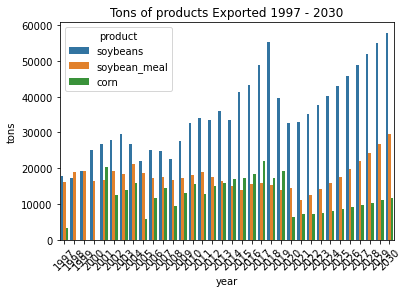

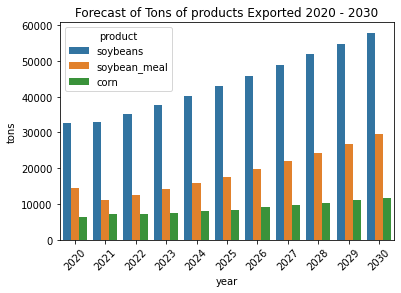

In [15]:
prediction_inputs = df_cov[(df_cov['year'] > 2019) & (df_cov['year'] < 2031)]

forecast_date = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]

training_inputs = np.array(df_cov_filtered[['year', 'price_soybeans','price_corn', 'price_soybean_meal', 'gdp_china','gdp_iran','gpd_netherlands','gdp_spain','gdp_thailand','gdp_world','gdp_egypt', 'gdp_japan', 'gdp_vietnam']])

training_outputs_soybeans = np.array(df_cov_filtered[['soybeans tons']])
training_outputs_meal = np.array(df_cov_filtered[['soybean_meal tons']])
training_outputs_corn = np.array(df_cov_filtered[['corn tons']])

# The function calculates the synaptic_weights based on the information given in the covariates file.
def prediction(training_outputs):
  training_inputs_pinv = np.linalg.pinv(training_inputs)
  # Calculate the synaptic_weights
  synaptic_weights = np.dot(training_inputs_pinv, training_outputs)
  # Multiply prediction_inputs and synaptic_weights to calculate the prediction_outputs
  return(np.dot(prediction_inputs, synaptic_weights))


prediction_output_soybeans = prediction(training_outputs_soybeans)
prediction_output_meal = prediction(training_outputs_meal)
prediction_output_corn = prediction(training_outputs_corn)

# Soybean
Forecast_soy = pd.DataFrame(forecast_date)
Forecast_soy.columns = ['year']
Forecast_soy['tons'] = pd.DataFrame(prediction_output_soybeans)
Forecast_soy['product'] = pd.DataFrame( ('soybeans' for date in forecast_date))

# Soybean_meal
Forecast_meal = pd.DataFrame(forecast_date)
Forecast_meal.columns = ['year']
Forecast_meal['tons'] = pd.DataFrame(prediction_output_meal)
Forecast_meal['product'] = pd.DataFrame( ('soybean_meal' for date in forecast_date))

# Corn
Forecast_corn = pd.DataFrame(forecast_date)
Forecast_corn.columns = ['year']
Forecast_corn['tons'] = pd.DataFrame(prediction_output_corn)
Forecast_corn['product'] = pd.DataFrame( ('corn' for date in forecast_date))

# Concatenate all the forecast data to plot a chart
Forecast = Forecast_soy.append(Forecast_meal.append(Forecast_corn))

# Concatenate all the (past + forecast) data to plot a chart
Exports = past.append(Forecast)

# Total tons of each product exported per year
sns.barplot(x='year', y = 'tons', data  = Exports, hue = 'product')
plt.xticks(rotation=45)
plt.title('Tons of products Exported 1997 - 2030')
plt.show()

sns.barplot(x='year', y = 'tons', data  = Forecast, hue = 'product')
plt.xticks(rotation=45)
plt.title('Forecast of Tons of products Exported 2020 - 2030')
plt.show()